In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv("data/CollegePlacement.csv")
print(f"shape ={data.shape} \nsize={data.size}")
data.head()

shape =(10000, 10) 
size=100000


,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [8]:
columns=[x for x in data.columns if data[x].dtype=="int64" or data[x].dtype=="float64"]
data[columns].corr()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
IQ,1.000000,-0.002640,-0.002859,-0.006827,-0.003458,-0.010896,0.014538
Prev_Sem_Result,-0.002640,1.000000,0.980768,-0.005765,0.009326,-0.017269,0.018434
CGPA,-0.002859,0.980768,1.000000,-0.002958,0.011441,-0.018242,0.020872
Academic_Performance,-0.006827,-0.005765,-0.002958,1.000000,0.011774,-0.019733,-0.013148
Extra_Curricular_Score,-0.003458,0.009326,0.011441,0.011774,1.000000,0.003769,0.008122
Communication_Skills,-0.010896,-0.017269,-0.018242,-0.019733,0.003769,1.000000,-0.004486
Projects_Completed,0.014538,0.018434,0.020872,-0.013148,0.008122,-0.004486,1.000000


<Axes: >

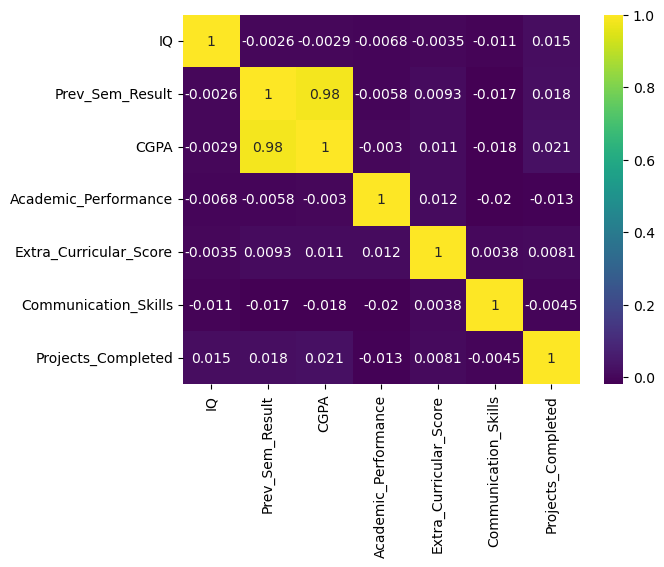

In [9]:
sns.heatmap(data[columns].corr(),annot=True,cmap="viridis")

# As CGPA and previous sem result has a 98% corelation heance one of them can be remove to reduce the traning time and data size

<Axes: ylabel='count'>

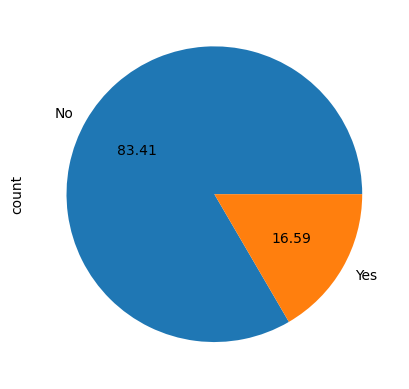

In [10]:
data["Placement"].value_counts().plot(kind="pie",autopct="%.2f")

# the data is highly imbalance and can cause the model to become bias

<Axes: xlabel='IQ', ylabel='Density'>

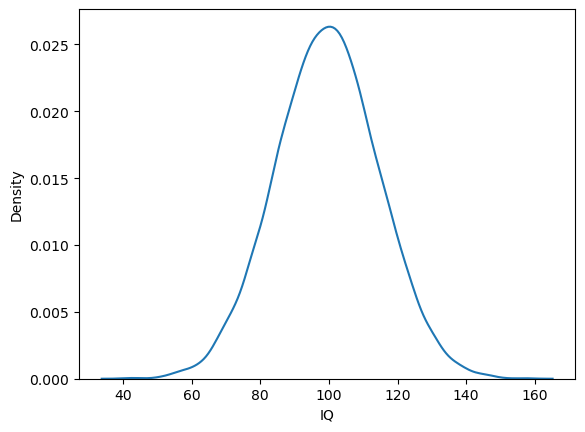

In [11]:
sns.kdeplot(data["IQ"])

<Axes: >

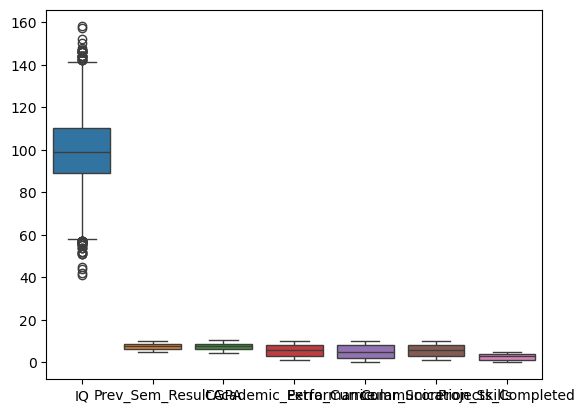

In [12]:
sns.boxplot(data)

# the data has a high variance in there range 

d:\programming\Machine Learning with python\end to end ML project with mlOPS and cicd Pipeline\venv\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


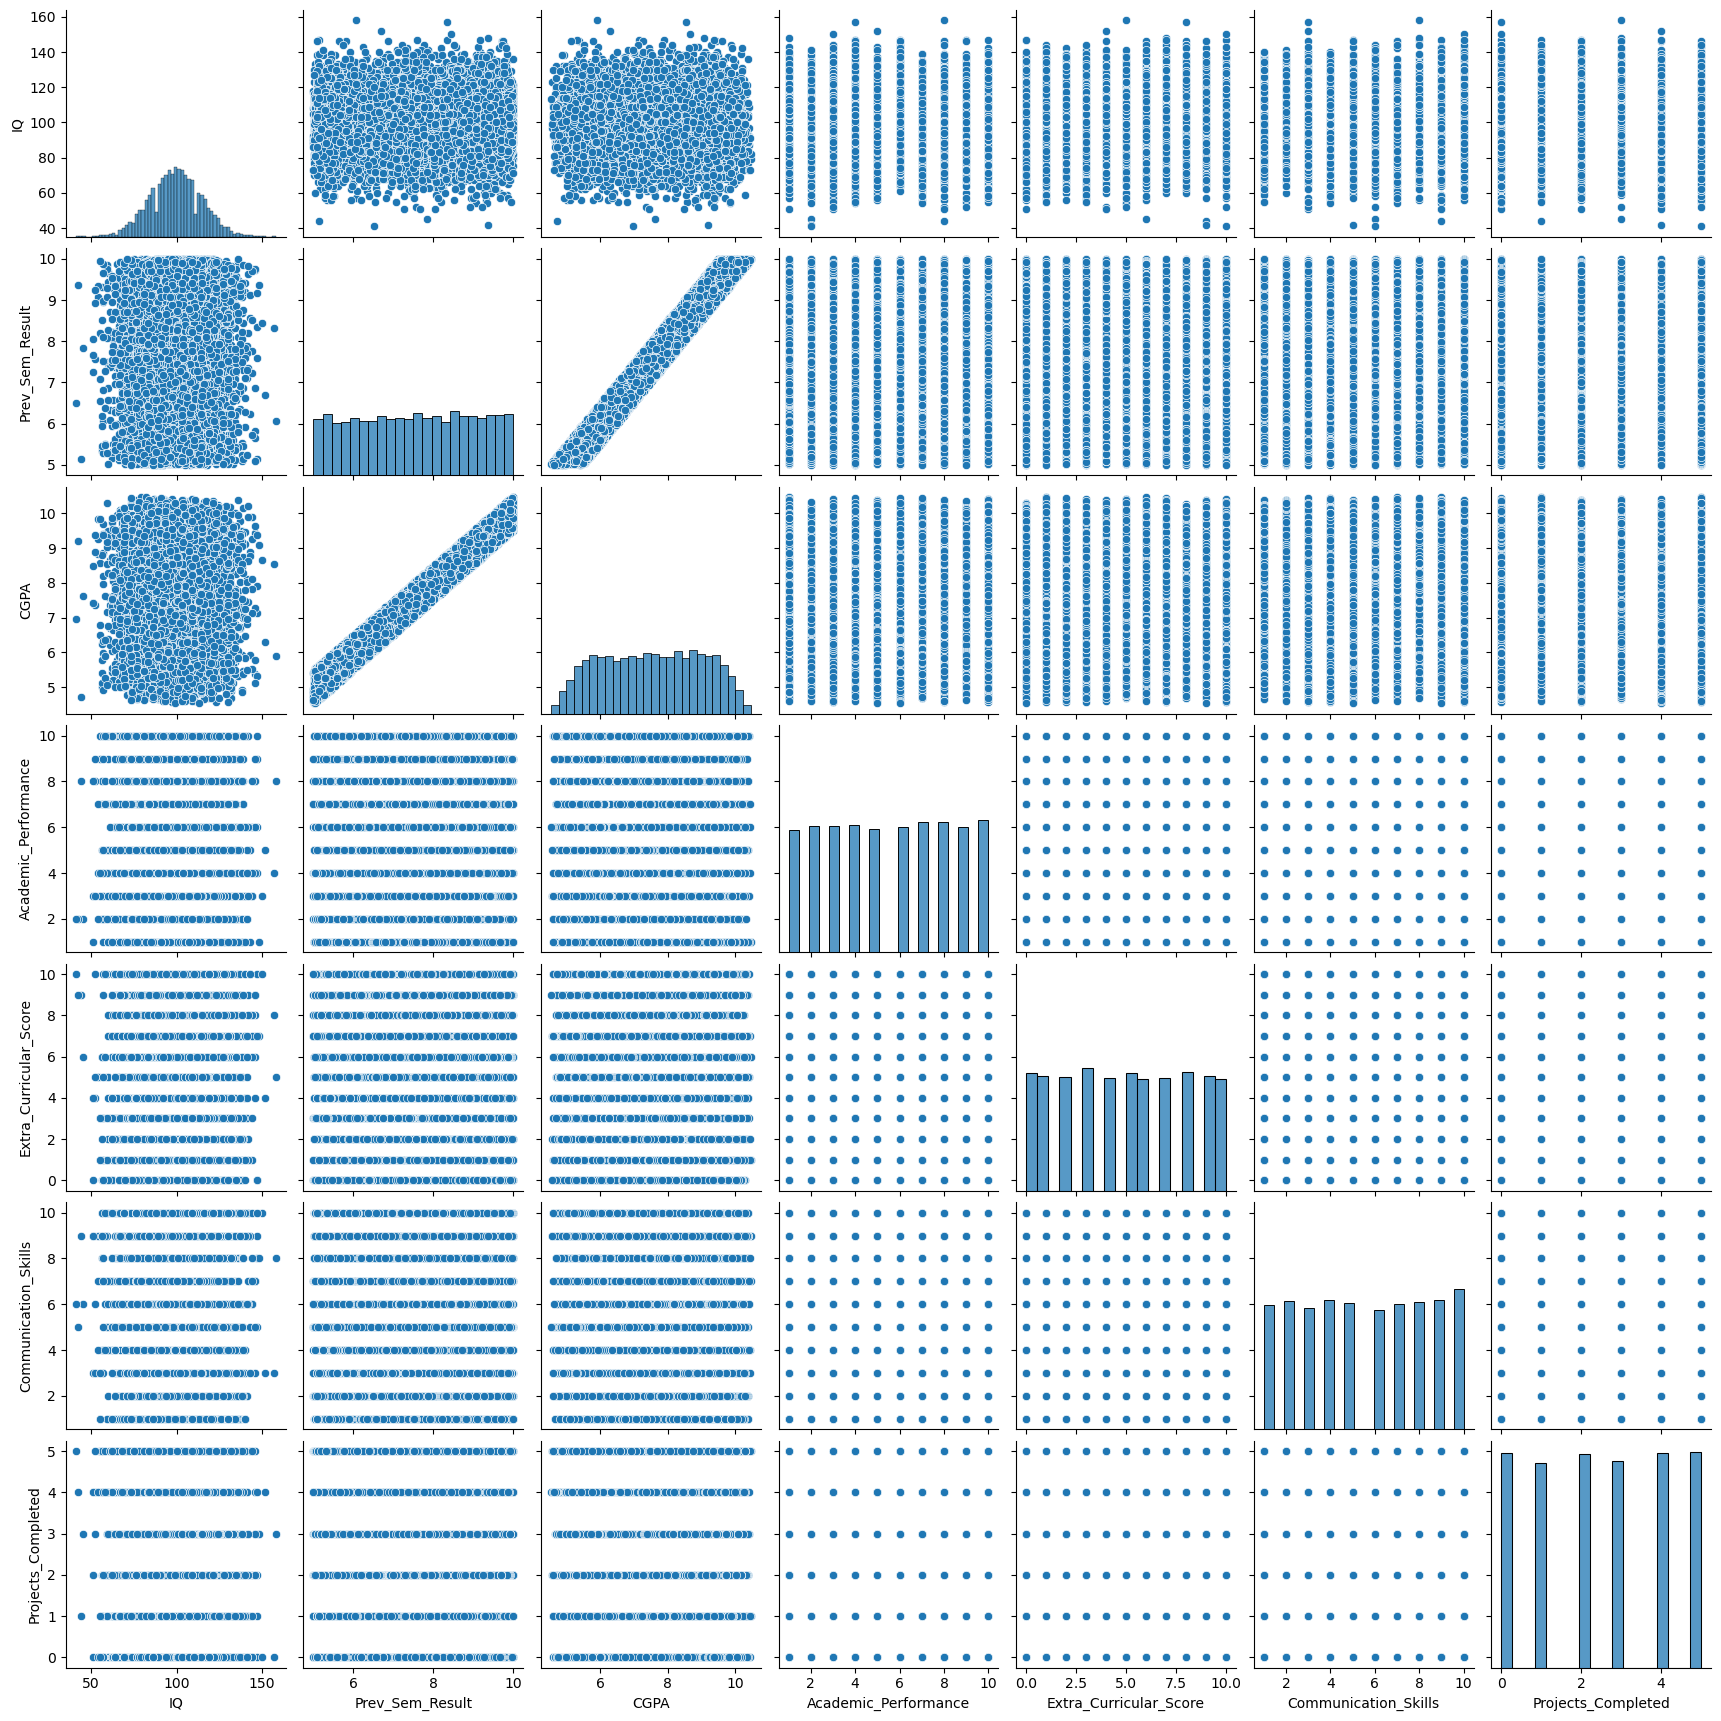

In [13]:
sns.pairplot(data)

In [14]:
sns.clustermap(data[columns].corr(),annot=True,cmap="viridis")

RuntimeError: clustermap requires scipy to be available

<Axes: ylabel='IQ'>

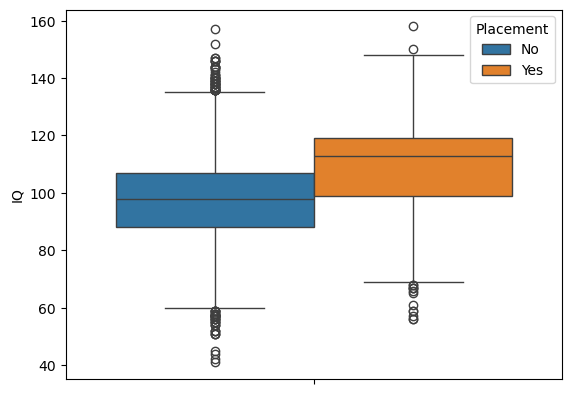

In [15]:
sns.boxplot(y=data["IQ"],hue=data["Placement"])

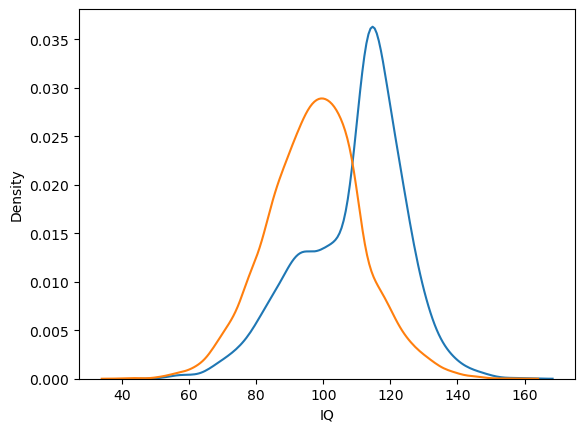

In [16]:
sns.kdeplot(x=data[data["Placement"]=="Yes"]["IQ"])
sns.kdeplot(x=data[data["Placement"]=="No"]["IQ"])
plt.show()

# Heance people with more iq can placed faster

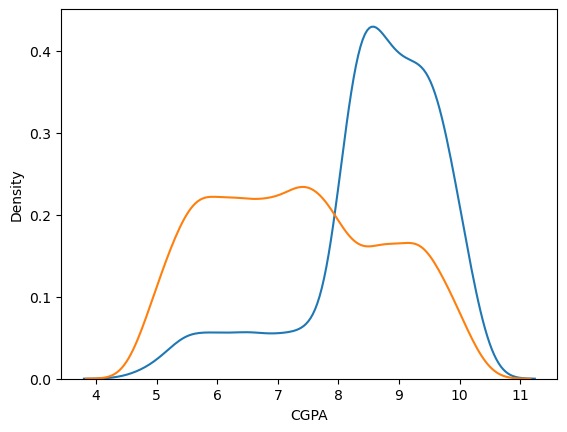

In [17]:
sns.kdeplot(x=data[data["Placement"]=="Yes"]["CGPA"])
sns.kdeplot(x=data[data["Placement"]=="No"]["CGPA"])
plt.show()

<Axes: xlabel='IQ', ylabel='CGPA'>

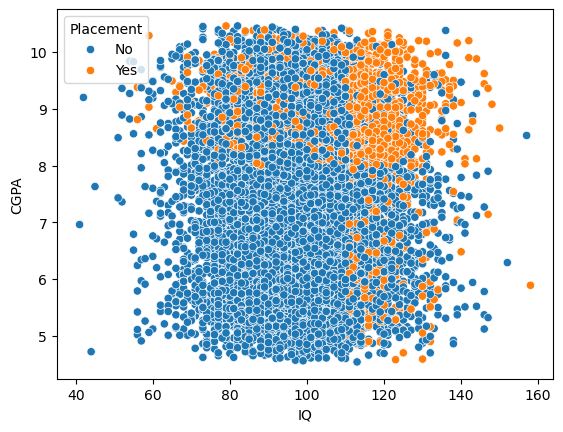

In [18]:
sns.scatterplot(x=data["IQ"],y=data["CGPA"],hue=data["Placement"])

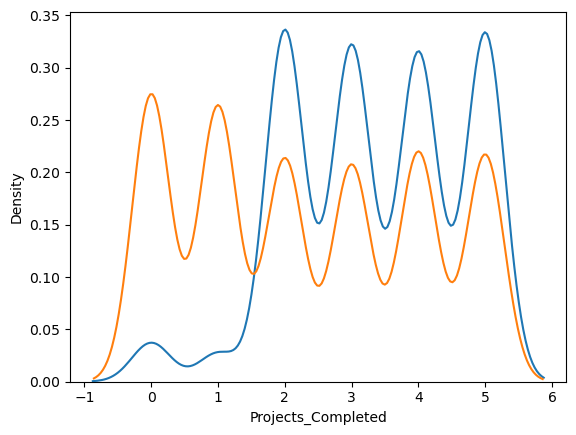

In [19]:
sns.kdeplot(x=data[data["Placement"]=="Yes"]["Projects_Completed"])
sns.kdeplot(x=data[data["Placement"]=="No"]["Projects_Completed"])
plt.show()

In [20]:
data.describe()

,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Extra_Curricular_Score,Communication_Skills,Projects_Completed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,99.471800,7.535673,7.532379,5.546400,4.970900,5.561800,2.513400
std,15.053101,1.447519,1.470141,2.873477,3.160103,2.900866,1.715959
min,41.000000,5.000000,4.540000,1.000000,0.000000,1.000000,0.000000
25%,89.000000,6.290000,6.290000,3.000000,2.000000,3.000000,1.000000
50%,99.000000,7.560000,7.550000,6.000000,5.000000,6.000000,3.000000
75%,110.000000,8.790000,8.770000,8.000000,8.000000,8.000000,4.000000
max,158.000000,10.000000,10.460000,10.000000,10.000000,10.000000,5.000000


<Axes: xlabel='Internship_Experience', ylabel='count'>

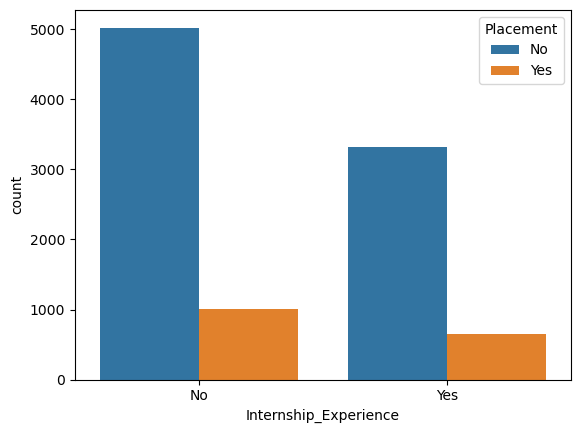

In [21]:
sns.countplot(x=data["Internship_Experience"],hue=data["Placement"])

In [22]:
PlacementData = data.groupby(["Internship_Experience","Placement"])
PlacementData["IQ"].count()

Internship_Experience  Placement
No                     No           5024
                       Yes          1012
Yes                    No           3317
                       Yes           647
Name: IQ, dtype: int64

In [23]:
PlacementData.count()

College_ID    IQ  Prev_Sem_Result  CGPA  \
Internship_Experience Placement                                            
No                    No               5024  5024             5024  5024   
                      Yes              1012  1012             1012  1012   
Yes                   No               3317  3317             3317  3317   
                      Yes               647   647              647   647   

                                 Academic_Performance  Extra_Curricular_Score  \
Internship_Experience Placement                                                 
No                    No                         5024                    5024   
                      Yes                        1012                    1012   
Yes                   No                         3317                    3317   
                      Yes                         647                     647   

                                 Communication_Skills  Projects_Completed  
Internship_Experience Placement                                            
No                    No                         5024                5024  
                      Yes                        1012                1012  
Yes                   No                         3317                3317  
                      Yes                         647                 647

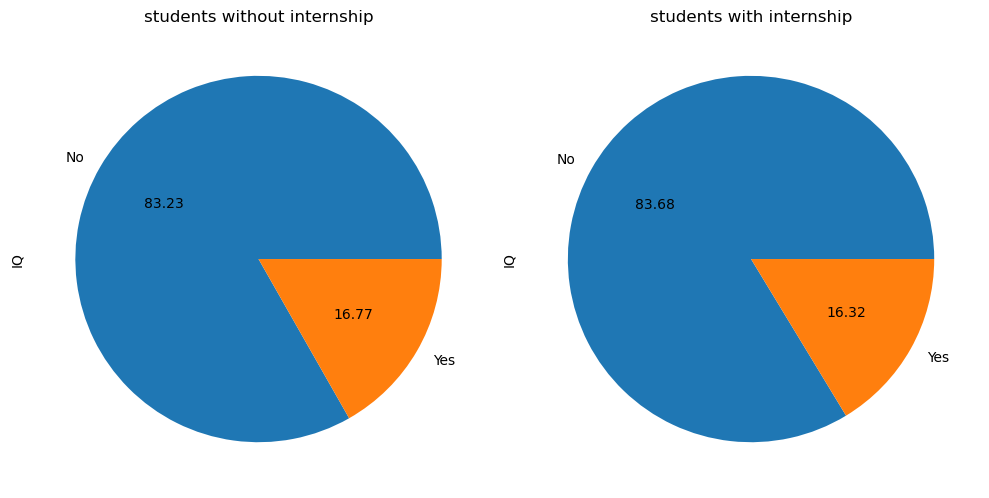

In [24]:
figure,(ax1,ax2) =plt.subplots(ncols=2,figsize=(10,7))
PlacementData["IQ"].count()["No"].plot(kind="pie",autopct="%.2f",ax=ax1)
ax1.set_title("students without internship")
PlacementData["IQ"].count()["Yes"].plot(kind="pie",autopct="%.2f",ax=ax2)
ax2.set_title("students with internship")
figure.tight_layout()

# internship exp dosen't play a imp role in the placement

In [26]:
#  one hot encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(data["Placement"])

LabelEncoder()

In [27]:
data["Placement"] = le.transform(data["Placement"])

In [28]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse_output=False)
ohe.fit(data[["Internship_Experience"]])

OneHotEncoder(sparse_output=False)

In [29]:
new_metric = ohe.transform(data[["Internship_Experience"]])
# [i for _,i in new_metric]
data["Internship_Experience"] = [int(i) for _,i in new_metric]

In [30]:
data.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,0,8,8,4,0
1,CLG0061,97,5.52,5.37,8,0,7,8,0,0
2,CLG0036,109,5.36,5.83,9,0,3,1,1,0
3,CLG0055,122,5.47,5.75,6,1,1,6,1,0
4,CLG0004,96,7.91,7.69,7,0,8,10,2,0


<Axes: >

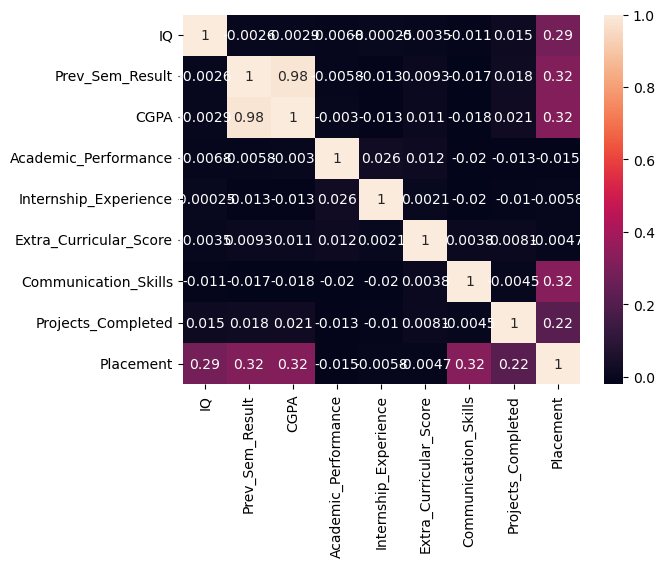

In [31]:
sns.heatmap(data.iloc[:,1:].corr(),annot=True)